### Data Cleaning and Preparation

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
uk_election_result = pd.read_excel(r'/Users/teslim/OneDrive/generaldata/1_uk_2024_election.xlsx', sheet_name=5)

uk_election_result

,CONSTITUENCY,REGION,2019,2024,TURNOUT %,SHARE %
0,Amber Valley,East Midlands,Conservative,Labour,60.3,37.0
1,Ashfield,East Midlands,Conservative,Reform UK,58.6,42.8
2,Bassetlaw,East Midlands,Conservative,Labour,57.4,41.2
3,Bolsover,East Midlands,Conservative,Labour,56.5,40.5
4,Boston & Skegness,East Midlands,Conservative,Reform UK,53.4,38.4
...,...,...,...,...,...,...
645,Thirsk & Malton,Yorkshire and the Humber,Conservative,Conservative,63.5,39.3
646,Wakefield & Rothwell,Yorkshire and the Humber,Conservative,Labour,54.2,43.7
647,Wetherby & Easingwold,Yorkshire and the Humber,Conservative,Conservative,70.3,39.4
648,York Central,Yorkshire and the Humber,Labour,Labour,54.5,56.6


In [86]:
# convert all the columns header to lower case 
uk_election_result.columns = uk_election_result.columns.str.lower()
uk_election_result


,constituency,region,NaN,NaN,turnout %,share %
0,Amber Valley,East Midlands,Conservative,Labour,60.3,37.0
1,Ashfield,East Midlands,Conservative,Reform UK,58.6,42.8
2,Bassetlaw,East Midlands,Conservative,Labour,57.4,41.2
3,Bolsover,East Midlands,Conservative,Labour,56.5,40.5
4,Boston & Skegness,East Midlands,Conservative,Reform UK,53.4,38.4
...,...,...,...,...,...,...
645,Thirsk & Malton,Yorkshire and the Humber,Conservative,Conservative,63.5,39.3
646,Wakefield & Rothwell,Yorkshire and the Humber,Conservative,Labour,54.2,43.7
647,Wetherby & Easingwold,Yorkshire and the Humber,Conservative,Conservative,70.3,39.4
648,York Central,Yorkshire and the Humber,Labour,Labour,54.5,56.6


In [87]:
# renaming the columns header
uk_election_result.columns.values[2] = 'votes_2019'
uk_election_result.columns.values[3] = 'votes_2024'
uk_election_result.columns.values[-1] = 'share'
uk_election_result.columns.values[-2] = 'outcome'
uk_election_result

,constituency,region,votes_2019,votes_2024,outcome,share
0,Amber Valley,East Midlands,Conservative,Labour,60.3,37.0
1,Ashfield,East Midlands,Conservative,Reform UK,58.6,42.8
2,Bassetlaw,East Midlands,Conservative,Labour,57.4,41.2
3,Bolsover,East Midlands,Conservative,Labour,56.5,40.5
4,Boston & Skegness,East Midlands,Conservative,Reform UK,53.4,38.4
...,...,...,...,...,...,...
645,Thirsk & Malton,Yorkshire and the Humber,Conservative,Conservative,63.5,39.3
646,Wakefield & Rothwell,Yorkshire and the Humber,Conservative,Labour,54.2,43.7
647,Wetherby & Easingwold,Yorkshire and the Humber,Conservative,Conservative,70.3,39.4
648,York Central,Yorkshire and the Humber,Labour,Labour,54.5,56.6


In [88]:
# checking for missing values
uk_election_result.isnull().sum()

constituency    0
region          0
votes_2019      0
votes_2024      0
outcome         1
share           1
dtype: int64

In [89]:
# fill missing values with 0
mean_uk_election = uk_election_result['outcome'].mean()

# fill missing values in the turnout with the median
uk_election_result['outcome'] = uk_election_result['outcome'].fillna(mean_uk_election)

# fill missing values in the share with the median
uk_election_result['share'] = uk_election_result['share'].fillna(mean_uk_election)


In [90]:
# checking for missing values
uk_election_result.isnull().sum()

constituency    0
region          0
votes_2019      0
votes_2024      0
outcome         0
share           0
dtype: int64

# Module 1: Summary Statistics
Summary statistics gives you the tools you need to boil down massive datasets to reveal the highlights. In this chapter, you'll explore summary statistics including mean, median, and standard deviation, and learn how to accurately interpret them. You'll also develop your critical thinking skills, allowing you to choose the best summary statistics for your data.

### Data type classification
_____


In the video, you learned about two main types of data: numeric and categorical. Numeric variables can be classified as either discrete or continuous, and categorical variables can be classified as either nominal or ordinal. These characteristics of a variable determine which ways of summarizing your data will work best.

### Measures of center
____

<Axes: >

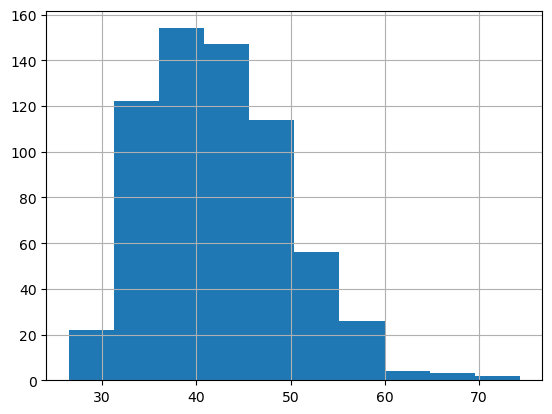

In [91]:
# visualizing the share column
uk_election_result['share'].hist()

<Axes: >

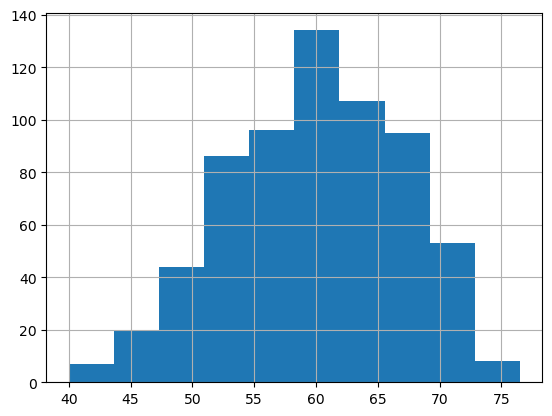

In [92]:
uk_election_result['outcome'].hist()

In [93]:
# measure the central tendency of the data
print(np.mean(uk_election_result['share']))
print(np.mean(uk_election_result['outcome']))

42.486726561574024
59.87226502311248


In [94]:
# measure the median of the data
print(np.median(uk_election_result['share']))
print(np.median(uk_election_result['outcome']))

41.5
60.2


To calculate the mode using NumPy, you can use the statisitcs function from the NumPy library. The mode function returns the most common value in an array. If there are multiple modes, it returns the smallest one. 



In [95]:
import statistics
print(statistics.mode(uk_election_result['share']))
print(statistics.mode(uk_election_result['outcome']))

35.6
59.9


In [96]:
# measure the mode of the data
print(uk_election_result['share'].mode())
print(uk_election_result['outcome'].mode())

0    35.6
Name: share, dtype: float64
0    59.9
Name: outcome, dtype: float64


In [97]:
uk_election_result['share'].describe().round(2)

count    650.00
mean      42.49
std        7.38
min       26.50
25%       36.70
50%       41.50
75%       47.28
max       74.30
Name: share, dtype: float64

In [98]:
uk_election_result['outcome'].describe().round(2)

count    650.00
mean      59.87
std        6.99
min       40.00
25%       55.12
50%       60.20
75%       65.30
max       76.50
Name: outcome, dtype: float64

### Measures of spread
____

### Variance and standard deviation

In [99]:
# measure the variance of the data
population_variance = np.var(uk_election_result['share'])
population_variance


# Without ddof=1 , population variance is calculated instead of sample variance:

54.430617034345104

In [100]:
# measure the variance of the data with ddof=1 (sample variance)
sample_variance = np.var(uk_election_result['share'], ddof=1)
sample_variance

54.51448547353516

In [101]:
# measure the standard deviation of the data
population_std = np.std(uk_election_result['share'])
population_std

7.377710826153672

In [102]:
# measure the standard deviation of the data
sample_std = np.std(uk_election_result['share'], ddof=1)
sample_std

7.383392544998211

### Absolute Mean Deviation

In [103]:
# measures of abslute mean deviation

# Step 1: Calculate the mean of the data
mean_uk_election

# Step 2: Calculate the absolute deviations from the mean
absolute_deviations = np.abs( (uk_election_result['share'] - mean_uk_election))
absolute_deviations

0      22.872265
1      17.072265
2      18.672265
3      19.372265
4      21.472265
         ...    
645    20.572265
646    16.172265
647    20.472265
648     3.272265
649    14.572265
Name: share, Length: 650, dtype: float64

In [104]:
# Step 3: Calculate the mean of these absolute deviations
mean_absolute_deviation = np.mean(absolute_deviations)
mean_absolute_deviation

17.555537276283033

####  Quantiles

The quantile function represent dividing the data into equal parts. The quantile function can be used to calculate the median, quartiles, and percentiles. The median is the 50th percentile, the first quartile is the 25th percentile, and the third quartile is the 75th percentile.
The syntax for the quantile function is `np.quantile(data, q)`, where data is the array and q is the quantile you want to calculate. For example, to calculate the median, you would use np.quantile(data, 0.5).

In [105]:
# measure the quantiles of the data
np.quantile(uk_election_result['share'], 0.50)

# this is the same as the median

41.5

In [106]:
# we can also calculate the quantiles using the quantile method
uk_election_result['share'].quantile(0.50)

41.5

In [107]:
# Multiple quantiles can be calculated at once by passing a list
np.quantile(uk_election_result['share'], [0, 0.25, 0.75, 0.5, 0.1])

array([26.5  , 36.7  , 47.275, 41.5  , 33.9  ])

Aside the above, we can calculate the quantitles with the `np.linspace()` function.


The `np.linspace()` function is used to create an array of evenly spaced values over a specified range. The function takes three arguments: the start of the range, the end of the range, and the number of values to generate. For example, to generate 10 evenly spaced values between 1 and 10, you can use the following code:

```python
np.linspace(1, 10, 10)
```

Combining the `np.quantile()` and `np.linspace()` functions allows you to calculate the quantiles for a dataset and visualize them on a box plot. The box plot is a standardized way of displaying the distribution of data based on a five-number summary: the minimum, first quartile, median, third quartile, and maximum. The box plot is a useful tool for identifying outliers and comparing distributions.

```python
import matplotlib.pyplot as plt

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

quantiles = np.linspace(0, 1, 5)
quantile_values = np.quantile(data, quantiles)

plt.boxplot(data)
plt.xticks([1], ['Data'])
plt.scatter([1] * len(data), data, alpha=0.5)
plt.scatter([1] * len(quantile_values), quantile_values, color='red')
plt.show()
```




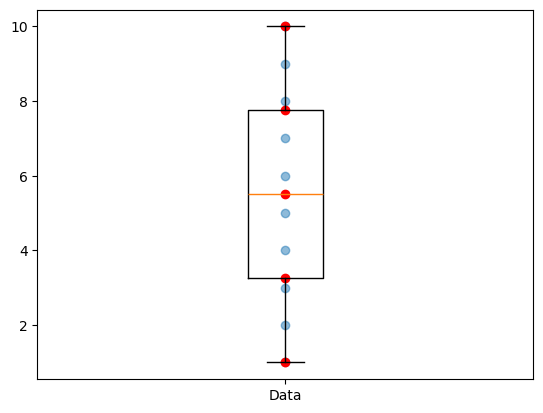

In [108]:
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

quantiles = np.linspace(0, 1, 5)
quantile_values = np.quantile(data, quantiles)

plt.boxplot(data)
plt.xticks([1], ['Data'])
plt.scatter([1] * len(data), data, alpha=0.5)
plt.scatter([1] * len(quantile_values), quantile_values, color='red')
plt.show()

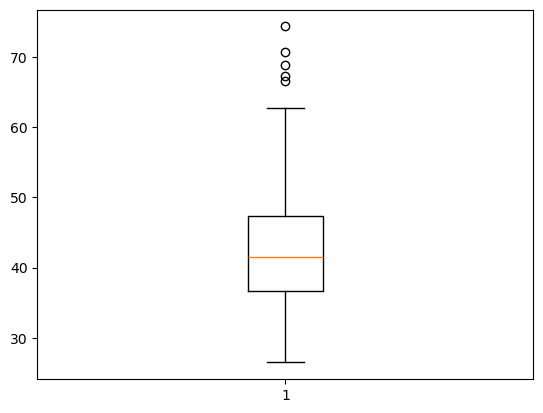

In [109]:
# boxplot use of quantiles
plt.boxplot(uk_election_result['share'])    
plt.show()

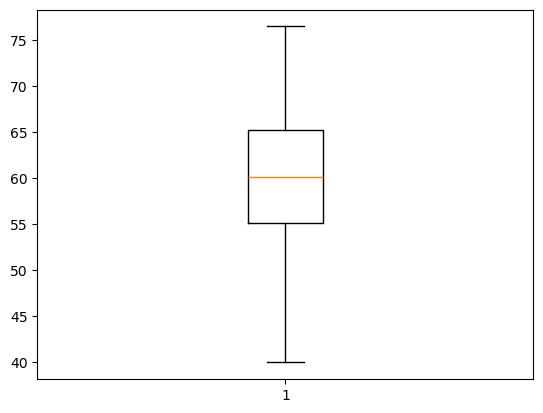

In [110]:
# boxplot use of quantiles
plt.boxplot(uk_election_result['outcome'])
plt.show()    

In [111]:
# interquartile range
q3, q1 = np.percentile(uk_election_result['share'], [75 ,25])

q1 
q3

# this can be represented as any variable and can be used to calculate the interquartile range
iqr = q3 - q1
iqr

10.574999999999996

In [112]:
# another way to calculate the interquartile range, is using the iqr method from scipy.stats
from scipy.stats import iqr
iqr(uk_election_result['share'])

10.574999999999996

### Measuaring an outlier
____

In [113]:
from IPython.display import Image

# Display an image from a file
Image(filename='/Users/teslim/OneDrive - Teslim Uthman Adeyanju/Teslim_data_science_study/note_3_python_language/'
      '/Teslim_python_png/outliiers.png', width=500, height=800)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/teslim/OneDrive - Teslim Uthman Adeyanju/Teslim_data_science_study/note_3_python_language//Teslim_python_png/outliiers.png'

In [33]:
# finding the outliers in the data
from scipy.stats import iqr

iqr = iqr(uk_election_result['share'])

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

lower_bound

NameError: name 'q1' is not defined

In [36]:
a = uk_election_result[uk_election_result['share'] < lower_bound]
b = uk_election_result[uk_election_result['share'] > upper_bound]


In [37]:
outlier = uk_election_result[a & b]

In [38]:
uk_election_result

,constituency,region,votes_2019,votes_2024,outcome,share
0,Amber Valley,East Midlands,Conservative,Labour,60.3,37.0
1,Ashfield,East Midlands,Conservative,Reform UK,58.6,42.8
2,Bassetlaw,East Midlands,Conservative,Labour,57.4,41.2
3,Bolsover,East Midlands,Conservative,Labour,56.5,40.5
4,Boston & Skegness,East Midlands,Conservative,Reform UK,53.4,38.4
...,...,...,...,...,...,...
645,Thirsk & Malton,Yorkshire and the Humber,Conservative,Conservative,63.5,39.3
646,Wakefield & Rothwell,Yorkshire and the Humber,Conservative,Labour,54.2,43.7
647,Wetherby & Easingwold,Yorkshire and the Humber,Conservative,Conservative,70.3,39.4
648,York Central,Yorkshire and the Humber,Labour,Labour,54.5,56.6


In [40]:
# using the groupby method to calculate the mean, median, standard deviation, variance and count of the share column
uk_election_result.groupby('votes_2019')['share'].agg(['mean', 'median', 'std', 'var', 'count'])

,mean,median,std,var,count
votes_2019,,,,,
Alliance,48.300000,48.30,NaN,NaN,1
Conservative,39.190349,38.70,5.175689,26.787756,373
Democratic Unionist Party,36.662500,37.95,7.576833,57.408393,8
Green,55.000000,55.00,NaN,NaN,1
Independent,50.433333,49.50,1.882374,3.543333,3
Labour,47.497462,47.70,7.550567,57.011065,197
Liberal Democrat,52.187500,53.10,5.049593,25.498393,8
Plaid Cymru,50.450000,50.45,4.879037,23.805000,2
Scottish National Party,44.014304,44.30,5.796399,33.598243,47


In [42]:
# filtering the data to get the conservative party
uk_election_result[uk_election_result['votes_2019'] == 'Conservative']

,constituency,region,votes_2019,votes_2024,outcome,share
0,Amber Valley,East Midlands,Conservative,Labour,60.3,37.0
1,Ashfield,East Midlands,Conservative,Reform UK,58.6,42.8
2,Bassetlaw,East Midlands,Conservative,Labour,57.4,41.2
3,Bolsover,East Midlands,Conservative,Labour,56.5,40.5
4,Boston & Skegness,East Midlands,Conservative,Reform UK,53.4,38.4
...,...,...,...,...,...,...
644,Spen Valley,Yorkshire and the Humber,Conservative,Labour,56.5,39.2
645,Thirsk & Malton,Yorkshire and the Humber,Conservative,Conservative,63.5,39.3
646,Wakefield & Rothwell,Yorkshire and the Humber,Conservative,Labour,54.2,43.7
647,Wetherby & Easingwold,Yorkshire and the Humber,Conservative,Conservative,70.3,39.4


<Axes: >

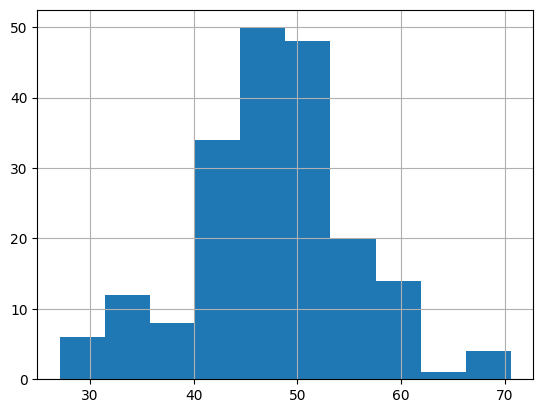

In [46]:
# visualizing the share of the labour party for share column
uk_election_result[uk_election_result['votes_2019'] == 'Labour']['share'].hist()

<Axes: >

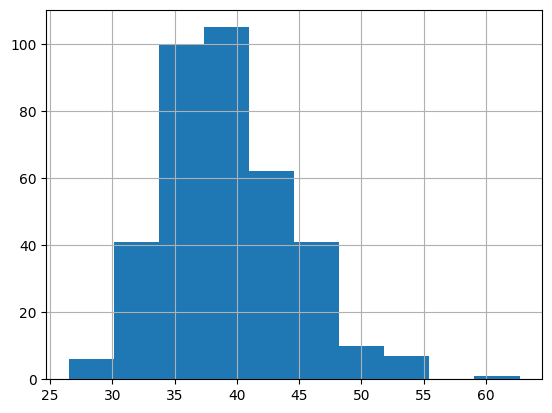

In [47]:
# visualizing the share of the conservative party for share column
uk_election_result[uk_election_result['votes_2019'] == 'Conservative']['share'].hist()

# Module 2: Random Numbers and Probability

In this chapter, you'll learn how to generate random samples and measure chance using probability. You'll work with real-world sales data to calculate the probability of a salesperson being successful. Finally, you’ll use the binomial distribution to model events with binary outcomes.


### Selecting random samples with replacement

In [32]:
data = [{'name': 'Alice', 'sales': 100}, {'name': 'Bob', 'sales': 200}, \
    {'name': 'Charlie', 'sales': 150}, \
    {'name': 'Diana', 'sales': 300}, {'name': 'Elisa', 'sales': 250}]

sales = pd.DataFrame(data)
sales


,name,sales
0,Alice,100
1,Bob,200
2,Charlie,150
3,Diana,300
4,Elisa,250


In [4]:
# selecting random samples
# this changes the data every time it is run
sales.sample(n=3)

,name,sales
3,Diana,300
2,Charlie,150
4,Elisa,250


In [5]:
# We can run the sample without number of samples
# this changes the data every time it is run, and it selects a random sample of 1
sales.sample()

,name,sales
2,Charlie,150


### Selecting random samples without replacement

To represent sample without replacement, we can use the replace paramenetr in the funtion as thus:

```python
data.sample(number, replace=True)
```

where 
- data is the dataset
- number is the number of samples to select
- replace is a boolean value that determines whether to sample with replacement. If replace=True, the sample is selected with replacement. If replace=False, the sample is selected without replacement.

In [7]:
sales.sample(5, replace=True)

,name,sales
0,Alice,100
1,Bob,200
3,Diana,300
4,Elisa,250
1,Bob,200


In [8]:
sales.sample(5, replace=True)

,name,sales
0,Alice,100
1,Bob,200
2,Charlie,150
0,Alice,100
1,Bob,200


### Setting a random seed

Seed is a number used to initialize a pseudorandom number generator. The seed is used to generate a sequence of random numbers. If you set the seed to the same value, you will get the same sequence of random numbers. This is useful for debugging and testing, as it allows you to reproduce the same sequence of random numbers.

In [6]:
# we can also set the random seed to get the same random sample every time
# this will return the same random sample every time
np.random.seed(10)
sales.sample(4)

,name,sales
2,Charlie,150
3,Diana,300
0,Alice,100
4,Elisa,250


#### Sampling with/without replacement in Python

it is a common pratice to have a sample of data from a population. The sample can be with or without replacement.

For a sample with replacement, you set the replace parameter to True. This means that each element in the population can be selected more than once. For a sample without replacement, you set the replace parameter to False. This means that each element in the population can be selected only once.

In [75]:
# Sampling with replacement
np.random.seed(2)
sales.sample(5, replace = True)

,name,sales
0,Alice,100
0,Alice,100
3,Diana,300
2,Charlie,150
3,Diana,300


In [79]:
# sample without replacement
np.random.seed(6)
sales.sample(5, replace = False)

,name,sales
3,Diana,300
4,Elisa,250
0,Alice,100
1,Bob,200
2,Charlie,150


In [33]:
def roll_die():
    return np.random.randint(1, 7)

# Example usage:
result = roll_die()
print(f"Rolled a die and got: {result}")


Rolled a die and got: 3


In [37]:
die = pd.Series([1, 2, 3, 4, 5, 6])
rolls_10 = die.sample(10, replace = True)
rolls_10

0    1
2    3
4    5
4    5
3    4
2    3
5    6
5    6
2    3
1    2
dtype: int64

### discrete Probability

In [74]:
uk_election_result

,constituency,region,votes_2019,votes_2024,outcome,share
0,Amber Valley,East Midlands,Conservative,Labour,60.3,37.0
1,Ashfield,East Midlands,Conservative,Reform UK,58.6,42.8
2,Bassetlaw,East Midlands,Conservative,Labour,57.4,41.2
3,Bolsover,East Midlands,Conservative,Labour,56.5,40.5
4,Boston & Skegness,East Midlands,Conservative,Reform UK,53.4,38.4
...,...,...,...,...,...,...
645,Thirsk & Malton,Yorkshire and the Humber,Conservative,Conservative,63.5,39.3
646,Wakefield & Rothwell,Yorkshire and the Humber,Conservative,Labour,54.2,43.7
647,Wetherby & Easingwold,Yorkshire and the Humber,Conservative,Conservative,70.3,39.4
648,York Central,Yorkshire and the Humber,Labour,Labour,54.5,56.6


In [39]:
uk_election_result['outcome'] / uk_election_result['share'].sum()

0      0.002183
1      0.002122
2      0.002078
3      0.002046
4      0.001934
         ...   
645    0.002299
646    0.001963
647    0.002546
648    0.001973
649    0.002426
Name: outcome, Length: 650, dtype: float64

#### Continuous distributions

In [35]:
# probability of a picking a 7 from a uniform distribution between 4 and 16 ()
from scipy.stats import uniform 
uniform.cdf(7, 4, 12)

np.float64(0.25)

In [36]:
# probability of a picking a 7 from a uniform distribution between 0 and 12
# probability of less than 
uniform.cdf(7, 0, 12)

np.float64(0.5833333333333334)

In [37]:
# "Greater than" probabilities
1- uniform.cdf(7, 0, 12)

np.float64(0.41666666666666663)

In [38]:
uniform.cdf(7, 0, 12) - uniform.cdf(4, 0, 12)

np.float64(0.25000000000000006)

In [43]:
uniform.rvs(0, 5, size=10)

array([0.25857804, 1.55928636, 0.2720045 , 2.89092127, 0.9484037 ,
       2.7732406 , 3.8073895 , 1.25275605, 1.61622496, 0.64334304])

In [44]:
uniform.cdf(0,30)

np.float64(0.0)

In [45]:

# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0,30,size=1000)

print(wait_times)

[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.73610958
 20.55950389 18.20349931  4.68857179 17.67638417 29.9

In [83]:
import matplotlib.pyplot
plt.hist(wait_times, bins=100)
plt.show()

NameError: name 'wait_times' is not defined

#### Binomial Distribution

The binomial distribution is a discrete probability distribution that models the number of successes in a fixed number of independent Bernoulli trials. A Bernoulli trial is an experiment with two possible outcomes: success or failure. The binomial distribution is characterized by two parameters: the number of trials and the probability of success on each trial. 

From the scipy library, we can use the `binom.rvs()` function to generate random samples from a binomial distribution. The function takes three arguments: 
- the number of trials, (count of coin)
- the probability of success, and 
- the number of samples to generate. (How many times to flip the coin)

For example, to generate 10 random samples from a binomial distribution with 10 trials and a success probability of 0.5, you can use the following code:

```python
from scipy.stats import binom

data = binom.rvs(n=10, p=0.5, size=10)
```


In [10]:
from  scipy.stats import binom

# a single flip of a coin
binom.rvs(1, 0.5, size=1)

array([1])

In [11]:
# single coin flip many times (10 times)
binom.rvs(1, 0.5, size=10)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [13]:
# flip 8 coins  with 50% probability of getting a head  10 times
binom.rvs(8, 0.5, size=10)

array([4, 4, 3, 3, 5, 5, 7, 7, 5, 5])

In [14]:

# Generate 10 random numbers from a binomial distribution with n=3 and p=0.5
binom.rvs(n=3,p=0.5, size=10)


array([1, 1, 0, 0, 0, 1, 1, 3, 1, 0])

In [21]:
# Generate 1 random number from a binomial distribution with n=8 and p=0.5
binom.rvs(n=8,p=0.5, size=1)

array([3])

In [22]:
# Generate 10 random numbers from a binomial distribution with n=3 and p=0.25
binom.rvs(3, 0.25, size=10)

array([0, 1, 0, 0, 0, 2, 1, 0, 3, 1])

In [23]:
binom.pmf(7, 10, 0.5)

np.float64(0.11718750000000004)

### Binomia Probabiltiies in Python

We use the binom.pmf() function to calculate the probability mass function (PMF) of a binomial distribution. The PMF gives the probability of observing a specific number of successes in a fixed number of trials. The function takes three arguments: the number of successes, the number of trials, and the probability of success. For example, to calculate the probability of observing 5 successes in 10 trials with a success probability of 0.5, you can use the following code:

```python
from scipy.stats import binom

p = binom.pmf(k=5, n=10, p=0.5)
```
where 
- k is the number of successes,
- n is the number of trials, and
- p is the probability of success.

In [15]:
# probability of getting 7 heads in 10 coin flips
# p(x = 7)
binom.pmf(7, 10, 0.5)

np.float64(0.11718750000000004)

In [16]:
# what is the probability of getting 7 or less heads in 10 coin flips
# p(x <= 7)
binom.cdf(7, 10, 0.5)

np.float64(0.9453125)

In [17]:
# what is the probability of getting more than 7 heads in 10 coin flips
# p(x > 7)
1 - binom.cdf(7, 10, 0.5)

np.float64(0.0546875)

#### Expected value of a binomial distribution

The expected value of a binomial distribution is the average number of successes in a fixed number of trials. The expected value is calculated as the product of the number of trials and the probability of success. You can use the following formula to calculate the expected value of a binomial distribution:

```python
expected_value = n * p
```

where
- n is the number of trials, and
- p is the probability of success.


# Module 3: More Distributions and the Central Limit Theorem

It’s time to explore one of the most important probability distributions in statistics, normal distribution. You’ll create histograms to plot normal distributions and gain an understanding of the central limit theorem, before expanding your knowledge of statistical functions by adding the Poisson, exponential, and t-distributions to your repertoire

### Normal Distribution
___

The normal distribution is a continuous probability distribution that is symmetric around the mean. The normal distribution is characterized by two parameters: the mean and the standard deviation. 

The mean determines the center of the distribution, while the standard deviation determines the spread of the distribution. The normal distribution is also known as the Gaussian distribution.

The syntax for the normal distribution is `scipy.stats.norm(loc, scale)`, 

where
- loc is the mean of the distribution, and
- scale is the standard deviation of the distribution.

To generate random samples from a normal distribution, you can use the rvs() function from the scipy.stats.norm module. The rvs() function takes three arguments: the mean, the standard deviation, and the number of samples to generate. For example, to generate 10 random samples from a normal distribution with a mean of 0 and a standard deviation of 1, you can use the following code:

```python
from scipy.stats import norm

data = norm.rvs(loc=0, scale=1, size=10)
```

Normal Distribution in Python

The normal distribution is a continuous probability distribution that is symmetric around the mean. The normal distribution is characterized by two parameters: the mean and the standard deviation. The mean determines the center of the distribution, while the standard deviation determines the spread of the distribution. The normal distribution is also known as the Gaussian distribution.

In [32]:
# probability of woman are shortedn than 154 cm
from scipy.stats import norm
norm.cdf(154, 161, 7)

np.float64(0.15865525393145707)

In [36]:
norm.cdf(65, 70, 3)

np.float64(0.047790352272814696)

In [33]:
# probability of woman are taller than 154 cm
1 - norm.cdf(154, 161, 7)

np.float64(0.8413447460685429)

In [35]:
# probability pf woman are between 154 and 168 cm
norm.cdf(168, 161, 7) - norm.cdf(154, 161, 7)

np.float64(0.6826894921370859)

The norm.ppf is the inverse of the cumulative distribution function (CDF). The CDF gives the probability that a random variable is less than or equal to a certain value. The inverse CDF gives the value of the random variable that corresponds to a certain probability. The norm.ppf function takes two arguments: the probability and the mean and standard deviation of the distribution. For example, to calculate the value of a random variable that corresponds to a probability of 0.5 in a normal distribution with a mean of 0 and a standard deviation of 1, you can use the following code:

```python
from scipy.stats import norm

value = norm.ppf(0.5, loc=0, scale=1)
```



In [38]:
from scipy.stats import norm

top_5_percent_score = norm.ppf(0.84, loc=161, scale=7)
print(top_5_percent_score)  # Output: ~86.45


167.96120518246826


The syntax for `norm.rvs()` function is 
    
```python
    from scipy.stats import norm

    data = norm.rvs(loc=0, scale=1, size=10)
```

where
- loc is the mean of the distribution,
- scale is the standard deviation of the distribution, and
- size is the number of samples to generate.

In [39]:
# genrating random numbers from a normal distribution
norm.rvs(loc=161, scale=7, size=10)

array([156.89967098, 153.62592946, 163.39821926, 152.84887605,
       162.79723432, 160.8736302 , 164.80754166, 169.7895792 ,
       155.22831867, 153.812441  ])

### Central Limit Theorem
____

The central theorem states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the shape of the population distribution. This is known as the central limit theorem. The central limit theorem is a fundamental concept in statistics and is used to make inferences about a population based on a sample.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
die = pd.Series([1, 2, 3, 4, 5, 6])

# roll a die 5 times
sample = die.sample(5, replace=True)   

print(sample)

# mean of the sample
print(sample.mean())


3    4
5    6
2    3
5    6
4    5
dtype: int64
4.8


[4.4, 2.4, 3.2, 3.6, 3.0, 4.8, 3.6, 3.8, 2.8, 2.4]


(array([2., 1., 1., 1., 0., 3., 0., 0., 1., 1.]),
 array([2.4 , 2.64, 2.88, 3.12, 3.36, 3.6 , 3.84, 4.08, 4.32, 4.56, 4.8 ]),
 <BarContainer object of 10 artists>)

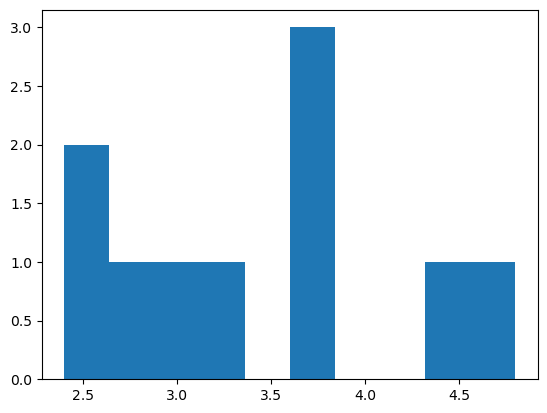

In [27]:
# Rolling the die 5 times at 10 different occasions
sample_means = []


for i in range(10):
    sample = die.sample(5, replace=True)
    sample_means.append(sample.mean())

print(sample_means)

plt.hist(sample_means)

[4.0, 3.4, 2.6, 3.8, 3.0, 4.0, 3.0, 4.0, 3.2, 2.8, 3.6, 3.6, 4.2, 4.4, 2.8, 3.4, 3.4, 3.0, 4.6, 3.6, 3.0, 4.6, 2.4, 3.8, 3.8, 2.8, 4.8, 4.0, 2.8, 4.6, 4.2, 3.2, 3.6, 3.6, 2.6, 4.4, 3.4, 2.8, 4.0, 3.8, 3.6, 5.0, 3.2, 3.2, 4.8, 3.6, 3.6, 2.6, 3.0, 2.8, 2.6, 3.4, 2.8, 4.2, 3.6, 4.2, 3.0, 3.4, 2.6, 4.2, 3.0, 3.2, 2.0, 4.2, 3.2, 4.4, 3.6, 3.2, 3.6, 3.4, 4.2, 2.8, 3.6, 3.8, 3.0, 3.8, 4.2, 2.8, 3.2, 3.6, 4.6, 2.8, 3.8, 2.0, 3.4, 3.4, 3.4, 2.0, 3.6, 3.8, 3.8, 2.8, 3.0, 3.4, 4.0, 4.0, 2.6, 4.0, 2.8, 3.8, 3.8, 3.2, 4.2, 3.0, 5.0, 3.6, 2.2, 3.8, 3.4, 3.0, 3.0, 2.6, 2.0, 3.6, 4.4, 2.8, 2.2, 3.2, 3.8, 3.2, 4.4, 4.4, 4.0, 4.6, 2.8, 3.6, 2.2, 5.2, 3.6, 3.8, 3.6, 4.2, 3.4, 3.6, 3.4, 2.2, 3.0, 4.2, 4.4, 4.4, 3.4, 3.6, 4.0, 3.0, 4.8, 3.0, 4.2, 2.8, 2.8, 3.2, 3.6, 3.6, 3.6, 2.4, 4.4, 4.4, 1.6, 3.8, 3.2, 3.2, 3.0, 2.8, 2.6, 3.4, 3.2, 3.0, 3.8, 2.0, 3.6, 2.2, 3.8, 3.2, 4.8, 3.2, 2.4, 3.0, 3.6, 3.6, 2.0, 3.4, 2.4, 4.0, 2.8, 3.6, 3.0, 3.4, 3.6, 2.6, 2.4, 4.8, 3.8, 3.4, 3.0, 4.0, 3.4, 3.8, 4.6, 2.8, 2.8, 4.6,

(array([ 17.,  46.,  90., 151., 195., 297., 113.,  65.,  18.,   8.]),
 array([1.4 , 1.84, 2.28, 2.72, 3.16, 3.6 , 4.04, 4.48, 4.92, 5.36, 5.8 ]),
 <BarContainer object of 10 artists>)

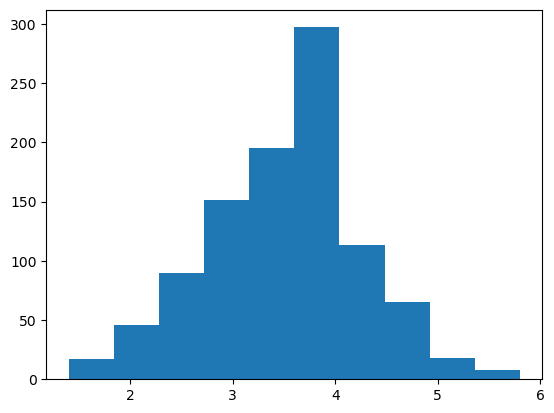

In [42]:
# Rolling the die 5 times at 10 different occasions
sample_means = []


for i in range(1000):
    sample = die.sample(5, replace=True)
    sample_means.append(sample.mean())

print(sample_means)

plt.hist(sample_means)

In [77]:
uk = uk_election_result
uk

,constituency,region,votes_2019,votes_2024,outcome,share
0,Amber Valley,East Midlands,Conservative,Labour,60.3,37.0
1,Ashfield,East Midlands,Conservative,Reform UK,58.6,42.8
2,Bassetlaw,East Midlands,Conservative,Labour,57.4,41.2
3,Bolsover,East Midlands,Conservative,Labour,56.5,40.5
4,Boston & Skegness,East Midlands,Conservative,Reform UK,53.4,38.4
...,...,...,...,...,...,...
645,Thirsk & Malton,Yorkshire and the Humber,Conservative,Conservative,63.5,39.3
646,Wakefield & Rothwell,Yorkshire and the Humber,Conservative,Labour,54.2,43.7
647,Wetherby & Easingwold,Yorkshire and the Humber,Conservative,Conservative,70.3,39.4
648,York Central,Yorkshire and the Humber,Labour,Labour,54.5,56.6


In [82]:
import re


np.random.seed(10)

result =[]
for i in range(10):
    sample = uk.share.sample(5, replace=True)
    sample_means.append(sample.mean())
    
result.append(sample_means)

print(result)
    

[[4.0, 3.4, 2.6, 3.8, 3.0, 4.0, 3.0, 4.0, 3.2, 2.8, 3.6, 3.6, 4.2, 4.4, 2.8, 3.4, 3.4, 3.0, 4.6, 3.6, 3.0, 4.6, 2.4, 3.8, 3.8, 2.8, 4.8, 4.0, 2.8, 4.6, 4.2, 3.2, 3.6, 3.6, 2.6, 4.4, 3.4, 2.8, 4.0, 3.8, 3.6, 5.0, 3.2, 3.2, 4.8, 3.6, 3.6, 2.6, 3.0, 2.8, 2.6, 3.4, 2.8, 4.2, 3.6, 4.2, 3.0, 3.4, 2.6, 4.2, 3.0, 3.2, 2.0, 4.2, 3.2, 4.4, 3.6, 3.2, 3.6, 3.4, 4.2, 2.8, 3.6, 3.8, 3.0, 3.8, 4.2, 2.8, 3.2, 3.6, 4.6, 2.8, 3.8, 2.0, 3.4, 3.4, 3.4, 2.0, 3.6, 3.8, 3.8, 2.8, 3.0, 3.4, 4.0, 4.0, 2.6, 4.0, 2.8, 3.8, 3.8, 3.2, 4.2, 3.0, 5.0, 3.6, 2.2, 3.8, 3.4, 3.0, 3.0, 2.6, 2.0, 3.6, 4.4, 2.8, 2.2, 3.2, 3.8, 3.2, 4.4, 4.4, 4.0, 4.6, 2.8, 3.6, 2.2, 5.2, 3.6, 3.8, 3.6, 4.2, 3.4, 3.6, 3.4, 2.2, 3.0, 4.2, 4.4, 4.4, 3.4, 3.6, 4.0, 3.0, 4.8, 3.0, 4.2, 2.8, 2.8, 3.2, 3.6, 3.6, 3.6, 2.4, 4.4, 4.4, 1.6, 3.8, 3.2, 3.2, 3.0, 2.8, 2.6, 3.4, 3.2, 3.0, 3.8, 2.0, 3.6, 2.2, 3.8, 3.2, 4.8, 3.2, 2.4, 3.0, 3.6, 3.6, 2.0, 3.4, 2.4, 4.0, 2.8, 3.6, 3.0, 3.4, 3.6, 2.6, 2.4, 4.8, 3.8, 3.4, 3.0, 4.0, 3.4, 3.8, 4.6, 2.8, 2.8, 4.6

### Poisson Distribution
____

The Poisson distribution is a discrete probability distribution that models the number of events that occur in a fixed interval of time or space. 

The Poisson distribution is characterized by one parameter: the rate of occurrence of events. The rate of occurrence is the average number of events that occur in a fixed interval of time or space. The Poisson distribution is used to model rare events that occur independently of each other.

The python code to generate random samples from a Poisson distribution is as follows:

```python
from scipy.stats import poisson

data = poisson.rvs(mu=2, size=10)
```

where
- mu is the rate of occurrence of events, and 
- size is the number of samples to generate.

The probability mass function (PMF) of a Poisson distribution gives the probability of observing a specific number of events in a fixed interval of time or space. The PMF is calculated using the poisson.pmf() function from the scipy.stats.poisson module. The poisson.pmf() function takes two arguments: the number of events and the rate of occurrence. For example, to calculate the probability of observing 2 events in a Poisson distribution with a rate of occurrence of 2, you can use the following code:

```python
from scipy.stats import poisson

p = poisson.pmf(k=2, mu=2)
```

where
- k is the number of events, and
- mu is the rate of occurrence.

The cmf function is used to calculate the cumulative distribution function (CDF) of a Poisson distribution. The CDF gives the probability of observing a number of events less than or equal to a certain value. The poisson.cdf() function takes two arguments: the number of events and the rate of occurrence. For example, to calculate the probability of observing 2 or fewer events in a Poisson distribution with a rate of occurrence of 2, you can use the following code:

```python
from scipy.stats import poisson

p = poisson.cdf(k=2, mu=2)
```

where
- k is the number of events, and
- mu is the rate of occurrence.

In [114]:
# probability of a single event
from scipy.stats import poisson

poisson.pmf(5, 8)

0.09160366159257921

In [115]:
# probability of 5 or less events
poisson.cdf(5, 8)

0.1912360620796254

In [116]:
# probability of more than 5 events
1 - poisson.cdf(5, 8)

0.8087639379203746

In [121]:
# sampling from a poisson distribution
poisson.rvs(8, size=10)

array([ 4,  6, 10, 11,  7,  8,  5,  8,  6, 12])

### Exponential Distribution
____

The exponential distribution is a continuous probability distribution that models the time between events in a Poisson process. The exponential distribution is characterized by one parameter: the rate of occurrence of events. 

The rate of occurrence is the average number of events that occur in a fixed interval of time or space. The exponential distribution is used to model the time between events in a Poisson process.

The pyhton code to generate random samples from an exponential distribution is as follows:

```python
from scipy.stats import expon

data = expon.rvs(scale=2, size=10)
```

where
- scale is the rate of occurrence of events, and
- size is the number of samples to generate.


The probability density function (PDF) of an exponential distribution gives the probability density of observing a specific time between events. The PDF is calculated using the expon.pdf() function from the scipy.stats.expon module. The expon.pdf() function takes two arguments: the time between events and the rate of occurrence. For example, to calculate the probability density of observing a time between events of 2 in an exponential distribution with a rate of occurrence of 2, you can use the following code:

```python
from scipy.stats import expon

p = expon.pdf(x=2, scale=2)
```

where
- x is the time between events, and
- scale is the rate of occurrence.

The cumulative distribution function (CDF) of an exponential distribution gives the probability of observing a time between events less than or equal to a certain value. The CDF is calculated using the expon.cdf() function from the scipy.stats.expon module. The expon.cdf() function takes two arguments: the time between events and the rate of occurrence. For example, to calculate the probability of observing a time between events of 2 or fewer in an exponential distribution with a rate of occurrence of 2, you can use the following code:

```python
from scipy.stats import expon

p = expon.cdf(x=2, scale=2)
```

where
- x is the time between events, and
- scale is the rate of occurrence.

In [130]:
from scipy.stats import expon

# probabbility of 1 or less
# if the mean is 0.5, then the scale is 1/0.5

expon.cdf(1, scale=2)

0.3934693402873666

In [131]:
from scipy.stats import expon

# probabbility of greater than 4
# if the mean is 0.5, then the scale is 1/0.5

1- expon.cdf(4, scale=2)

0.1353352832366127

In [132]:
# probabbility of between 1 and 4

expon.cdf(4, scale=2) - expon.cdf(1, scale=2)

0.4711953764760207

# Module 4: Correlation and Experimental Design

In this chapter, you'll learn how to quantify the strength of a linear relationship between two variables, and explore how confounding variables can affect the relationship between two other variables. You'll also see how a study’s design can influence its results, change how the data should be analyzed, and potentially affect the reliability of your conclusions.


In [6]:
uk_election_result 

,CONSTITUENCY,REGION,2019,2024,TURNOUT %,SHARE %
0,Amber Valley,East Midlands,Conservative,Labour,60.3,37.0
1,Ashfield,East Midlands,Conservative,Reform UK,58.6,42.8
2,Bassetlaw,East Midlands,Conservative,Labour,57.4,41.2
3,Bolsover,East Midlands,Conservative,Labour,56.5,40.5
4,Boston & Skegness,East Midlands,Conservative,Reform UK,53.4,38.4
...,...,...,...,...,...,...
645,Thirsk & Malton,Yorkshire and the Humber,Conservative,Conservative,63.5,39.3
646,Wakefield & Rothwell,Yorkshire and the Humber,Conservative,Labour,54.2,43.7
647,Wetherby & Easingwold,Yorkshire and the Humber,Conservative,Conservative,70.3,39.4
648,York Central,Yorkshire and the Humber,Labour,Labour,54.5,56.6


In [14]:
uk_election_result.columns = ['constituency', 'region', 'votes_2019', 'votes_2024', 'share', 'outcome']
uk = uk_election_result
uk

,constituency,region,votes_2019,votes_2024,share,outcome
0,Amber Valley,East Midlands,Conservative,Labour,60.3,37.0
1,Ashfield,East Midlands,Conservative,Reform UK,58.6,42.8
2,Bassetlaw,East Midlands,Conservative,Labour,57.4,41.2
3,Bolsover,East Midlands,Conservative,Labour,56.5,40.5
4,Boston & Skegness,East Midlands,Conservative,Reform UK,53.4,38.4
...,...,...,...,...,...,...
645,Thirsk & Malton,Yorkshire and the Humber,Conservative,Conservative,63.5,39.3
646,Wakefield & Rothwell,Yorkshire and the Humber,Conservative,Labour,54.2,43.7
647,Wetherby & Easingwold,Yorkshire and the Humber,Conservative,Conservative,70.3,39.4
648,York Central,Yorkshire and the Humber,Labour,Labour,54.5,56.6


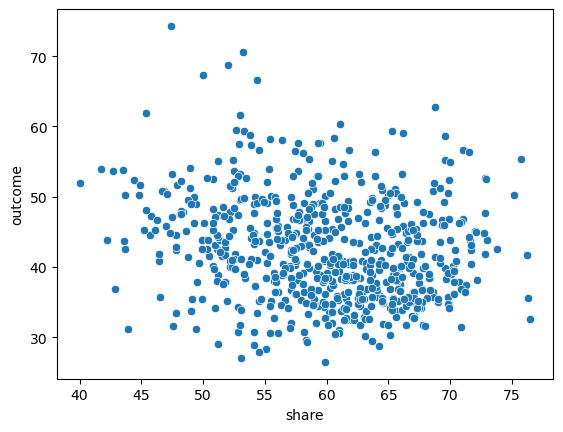

In [18]:
sns.scatterplot(data=uk, x='share', y='outcome')
plt.show()

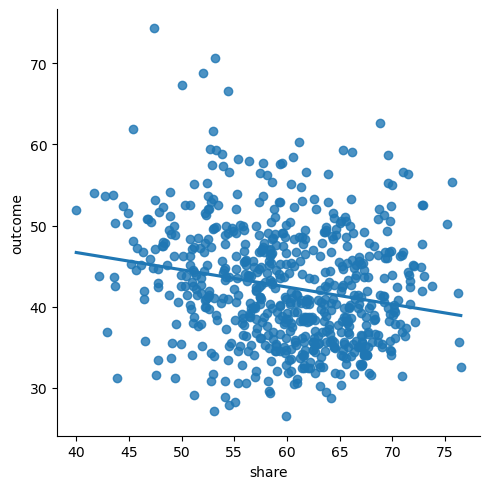

In [21]:
sns.lmplot(data=uk, x='share', y='outcome', ci=None)
plt.show()

In [22]:
uk

,constituency,region,votes_2019,votes_2024,share,outcome
0,Amber Valley,East Midlands,Conservative,Labour,60.3,37.0
1,Ashfield,East Midlands,Conservative,Reform UK,58.6,42.8
2,Bassetlaw,East Midlands,Conservative,Labour,57.4,41.2
3,Bolsover,East Midlands,Conservative,Labour,56.5,40.5
4,Boston & Skegness,East Midlands,Conservative,Reform UK,53.4,38.4
...,...,...,...,...,...,...
645,Thirsk & Malton,Yorkshire and the Humber,Conservative,Conservative,63.5,39.3
646,Wakefield & Rothwell,Yorkshire and the Humber,Conservative,Labour,54.2,43.7
647,Wetherby & Easingwold,Yorkshire and the Humber,Conservative,Conservative,70.3,39.4
648,York Central,Yorkshire and the Humber,Labour,Labour,54.5,56.6


In [23]:
uk['outcome'].corr(uk['share'])

-0.20218093483801833

In [26]:
uk['share'].corr(uk['outcome'])

-0.20218093483801836

In [28]:
data = pd.read_csv('/Users/teslim/OneDrive/generaldata/2-World_Happiness_Report_2024.csv')
data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [31]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


<Axes: ylabel='Frequency'>

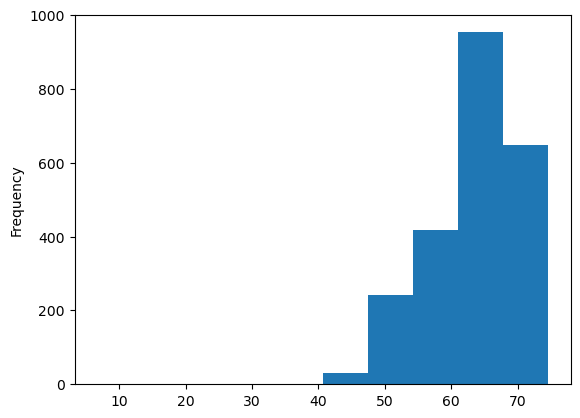

In [32]:
data['healthy_life_expectancy_at_birth'].plot(kind='hist')

In [ ]:
data['healthy_life_expectancy_at_birth'] = np.log(data['healthy_life_expectancy_at_birth'])


<Axes: ylabel='Frequency'>

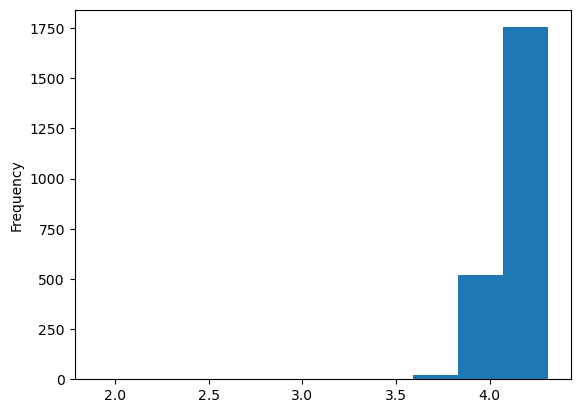

In [34]:
data['healthy_life_expectancy_at_birth'].plot(kind='hist')